In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
sys.path.append('../../')
import src.evaluators.coco_evaluator as coco_evaluator
import src.evaluators.pascal_voc_evaluator as pascal_voc_evaluator
import src.utils.converter as converter
import src.utils.general_utils as general_utils
from src.bounding_box import BoundingBox
from src.utils.enumerators import (BBFormat, BBType, CoordinatesType,
                                   MethodAveragePrecision)

def plot_bb_per_classes(dict_bbs_per_class,
                        horizontally=True,
                        rotation=0,
                        show=False,
                        extra_title=''):
    plt.close()
    if horizontally:
        ypos = np.arange(len(dict_bbs_per_class.keys()))
        plt.barh(ypos, dict_bbs_per_class.values(), align='edge')
        plt.yticks(ypos, dict_bbs_per_class.keys(), rotation=rotation)
        plt.xlabel('amount of bounding boxes')
        plt.ylabel('classes')
    else:
        plt.bar(dict_bbs_per_class.keys(), dict_bbs_per_class.values())
        plt.xlabel('classes')
        plt.ylabel('amount of bounding boxes')
    plt.xticks(rotation=rotation)
    title = f'Distribution of bounding boxes per class {extra_title}'
    plt.title(title)
    if show:
        plt.tick_params(axis='x', labelsize=10) # Set the x-axis label size
        plt.show(block=True)
    return plt

In [2]:
#############################################################
# DEFINE GROUNDTRUTHS AND DETECTIONS
#############################################################
# # VOC-2007
# dir_imgs    = '../../data/database/images'
# dir_gts     = '../../data/database/gts/pascalvoc_format'
# dir_dets    = '../../data/database/dets/abs_xyx2y2'
# dir_outputs = '../../data/database/images_with_bbs'
# filepath_class_names = '../../toyexample/voc.names'
# # toyexample-cat
# dir_imgs    = '../../toyexample/images'
# dir_gts     = '../../toyexample/gts_vocpascal_format'
# dir_dets    = '../../toyexample/dets_classname_abs_xyx2y2'
# dir_outputs = '../../toyexample/images_with_bbs'
# filepath_class_names = None

# supervisely-kiwi-lemon
dir_imgs    = '../../toyexample/JPEGImages'
dir_gts     = '../../toyexample/Annotations'
dir_dets    = '../../toyexample/dets_classid_abs_xyx2y2_kiwi_lemons_noised'
dir_outputs = '../../toyexample/images_with_bbs'
filepath_class_names = '../../toyexample/kiwi_lemon.names'

# Get annotations (ground truth and detections)
gt_bbs  = converter.vocpascal2bb(dir_gts)
det_bbs = converter.text2bb(annotations_path = dir_dets, 
                            bb_type          = BBType.DETECTED, 
                            bb_format        = BBFormat.XYX2Y2,# XYX2Y2
                            type_coordinates = CoordinatesType.ABSOLUTE, 
                            img_dir          = dir_imgs,
                            file_obj_names   = filepath_class_names)

In [3]:
# #############################################################
# # EVALUATE WITH COCO METRICS
# #############################################################
coco_res2 = coco_evaluator.get_coco_metrics(gt_bbs, det_bbs)
for class_ in coco_res2:
    print(class_, coco_res2[class_]['AP'])

kiwi 0.9089108910891087
lemon 1.0


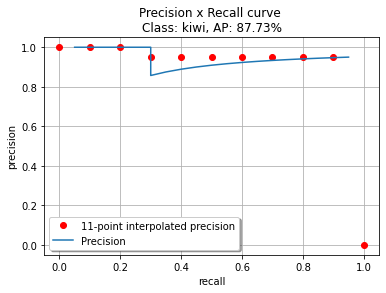

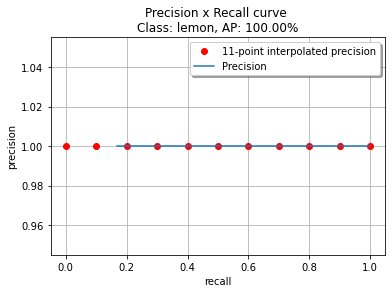

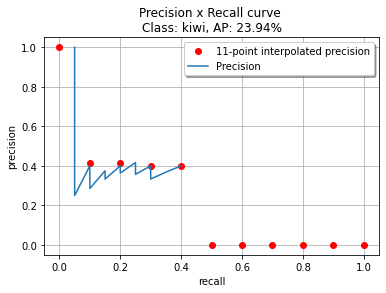

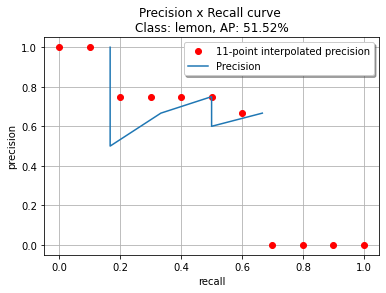

In [4]:
#############################################################
# EVALUATE WITH VOC PASCAL METRICS
#############################################################
ious = [0.5, 0.75] # 
voc_res = {}
for iou in ious:
    dict_res = pascal_voc_evaluator.get_pascalvoc_metrics(gt_bbs, det_bbs, iou, generate_table=True, 
                                                          method=MethodAveragePrecision.ELEVEN_POINT_INTERPOLATION) # ELEVEN_POINT_INTERPOLATION
    voc_res = dict_res['per_class']
    pascal_voc_evaluator.plot_precision_recall_curves(voc_res, showInterpolatedPrecision=True, showAP=True)